In [6]:
import numpy as np
from matplotlib import pyplot as plt
from numpy.random import normal
from scipy.stats import norm

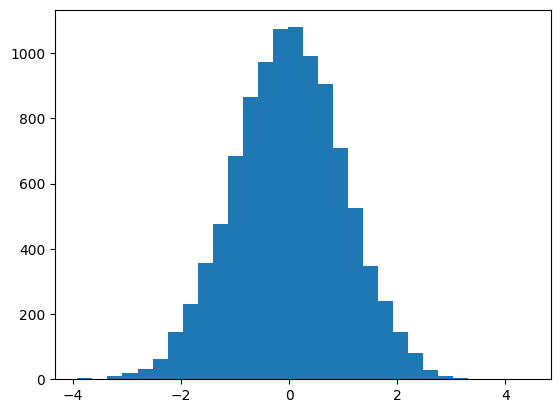

In [2]:
sample = normal(size=10000) # generador aleatorio basado en la distribución normal
plt.hist(sample, bins=30)
plt.show()

## Estimación paramétrica

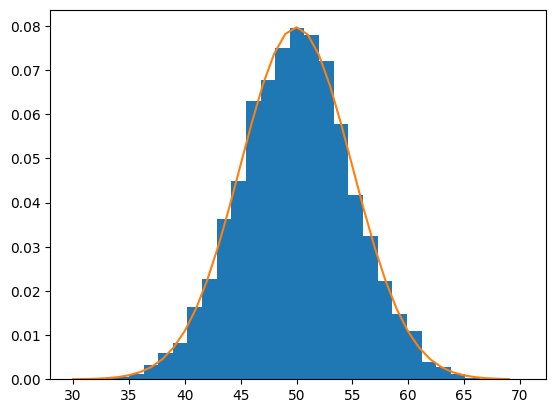

In [8]:
sample = normal(loc=50, scale=5, size=10000) # mu = 50, sigma = 5
mu = sample.mean()
sigma = sample.std()
dist = norm(mu, sigma)
values = [value for value in range(30, 70)]
probabilities = [dist.pdf(value) for value in values]
plt.hist(sample, bins=30, density=True)
plt.plot(values, probabilities)
plt.show()

# Estimación no paramétrica

`Kernel Density estimation`
* [parámetro de suavizado]: smoothing parameter
* [función base]: basis function

https://scikit-learn.org/stable/modules/density.html


In [10]:
from numpy import hstack
from sklearn.neighbors import KernelDensity

#construimos una distribución bimodal
sample1 = normal(loc=20, scale=5, size=3000)
sample2 = normal(loc=40, scale=5, size=7000)
sample = hstack((sample1, sample2))

model = KernelDensity(bandwidth=2, kernel='gaussian')
sample = sample.reshape((len(sample), 1))
model.fit(sample)

KernelDensity(bandwidth=2)

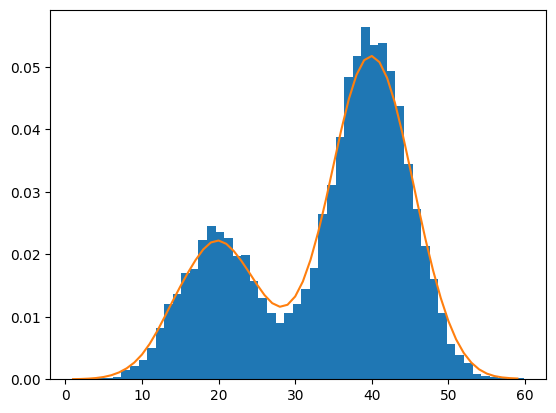

In [14]:
values = np.asarray([value for value in range(1, 60)])
values = values.reshape((len(values), 1))
probabilities = model.score_samples(values) # Probabilidad logarítmica
probabilities = np.exp(probabilities)  # Regresar al espacio lineal de probabilidad

plt.hist(sample, bins = 50, density=True)
plt.plot(values, probabilities)
plt.show()